# Clase No. 1 - Fundamentos teóricos del despliegue de modelos del Machine Learning

### Capítulo 1: Conceptos claves

### 🚀 Definición y Objetivos de MLOps
**¿Qué es MLOps?**: MLOps es la integración de prácticas de DevOps en el ciclo de vida de la inteligencia artificial, mejorando la gestión del desarrollo, despliegue y operación continua de modelos de machine learning.

**Beneficios de MLOps**: Facilita la colaboración entre equipos de datos y desarrollo, acelera el despliegue de modelos y asegura su mantenimiento eficiente, lo que lleva a soluciones más robustas y escalables.

### 🛠️ Prácticas y Herramientas en MLOps
**Automatización**: La automatización es clave en MLOps para asegurar que los modelos de machine learning se desarrollen y desplieguen de manera eficiente. Herramientas como **Jenkins** (un servidor de automatización open source) y **GitHub Actions** (plataforma gratuita para la automatización de workflows) se utilizan para **CI/CD** (Integración Continua/Despliegue Continuo). CI/CD es un conjunto de prácticas que permiten integrar código de manera continua, probarlo automáticamente y desplegarlo a producción con rapidez, minimizando errores humanos y tiempos de inactividad.

### Capítulo 2: Objetivos  

## 📊 Objetivo

Determinar el precio de la acción de **Mercado Libre (MELI)** en el mercado de valores para tomar decisiones estratégicas de compra o venta y maximizar el margen de ganancia.

🔍 Partimos de la premisa de que las acciones pueden mostrar patrones de comportamiento estacional (como un aumento antes de la presentación de balances) 📈 o seguir una tendencia relacionada con el mercado en el que operan.

El objetivo es detectar estas fluctuaciones y realizar predicciones precisas para decidir si es el momento adecuado para:

- Vender y luego comprar más adelante 🕒
- Comprar ahora para vender a un precio más alto en el futuro 📅💹


*-Luego de armar este hermoso codigo, la bala de Plata!! nos vamos con Mlops, usando WAND 💹**

### Capítulo 3: MLOps como despliegue de proyectos de aprendizaje automático

**Monitoreo y Alertas**: Para asegurar el rendimiento de los modelos en producción, se utilizan herramientas de monitoreo como **Prometheus** y **Grafana**. **Prometheus** es una herramienta open source para la recolección y almacenamiento de métricas en tiempo real, mientras que **Grafana** es una plataforma de visualización de datos que ofrece opciones gratuitas y pagas para crear dashboards interactivos. Estas herramientas son esenciales para detectar y responder rápidamente a cualquier degradación en el rendimiento de los modelos.

**wandb (Weights and Biases)**: Es una herramienta freemium diseñada específicamente para MLOps, que permite rastrear experimentos, visualizar métricas de entrenamiento y gestionar hiperparámetros en proyectos de machine learning. **wandb** facilita la colaboración entre equipos de ciencia de datos al proporcionar un historial detallado de los experimentos y ayuda a optimizar modelos de manera eficiente.


### Capítulo 4: Visión del MLOps a futuro

El futuro de MLOps se perfila hacia una mayor automatización, integración con herramientas de inteligencia artificial generativa y enfoque en la gobernanza responsable de modelos. 🚀 Se espera que surjan plataformas más accesibles que permitan a equipos interdisciplinarios trabajar con menos fricción. La ética, la trazabilidad de decisiones y la equidad serán ejes centrales, impulsados por marcos normativos emergentes. 🧭 Además, la evolución hacia MLOps sin código (no-code/low-code) democratizará su uso más allá de los perfiles técnicos. 🌐

# Clase No. 2 - Series temporales en inversiones: contexto y beneficios
### Capítulo 1: Contexto del caso estudiado
### Capítulo 2: La importancia de resolver problemas financieros
### Capítulo 3: Cómo las series temporales predominan los mercados globales
### Capítulo 4: Los beneficios de tener un pensamiento matemático para desarrollar series

# Clase No. 3 - EDA del ejercicio a realizar

Capítulo 1: Generalidades del caso a abordar

                                            Análisis Exploratorio y Manipulación de datos

Importamos librerías

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
import statsmodels.api as sm
import pmdarima as pm


from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from sklearn import metrics
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler




import warnings
warnings.filterwarnings("ignore")

Definimos la función para evaluar los parámetros.

Se busca medir los modelos con el error medio cuadrático y para validar, la raíz del error medio cuadrático medio y el R2. La intención es que tomaremos el modelo que mejor ajuste tenga los valores predichos con los valores reales. Dependiendo de la empresa, los valores de referencia pueden ser distintos los de referencia normal.

El hecho de que tengamos un R2 del 60% en una acción es más que suficiente ya que los precios de las acciones son difíciles de predecir en función de las expectativas que rondan sobre la empresa, el mercado, la política monetaria, el tipo de cambio y el origen de las acciones, cómo tantas ciscunstancias sucedan. Cómo se trabaja sobre acciones que cotizan en Nasdaq, nos centraremos en los factores de tipo mas fundamentals y no tanto de origen nacional cómo la inflación o el tipo de cambio.

Entre estos factores son: las unidades de negocios que opera Mercado Libre, análisis de balance y  la inflación Norteamericana.

Se toma precios al período de un año, para ver las expectativas de crecimiento. No sería conveniente ampliar el período ya que en años anteriores sucedieron hechos que alteraron los precios y puedan influir en las observaciones. Por ejemplo, conflicto de Rusia-Ucrania.

In [ ]:
def evaluacion_metrica(y_true, y_pred):

    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

# Capítulo 2: análisis exploratorio  

Importamos los datos.

In [ ]:
# Especifica la ruta completa al archivo CSV
file_path = r"C:\Users\julio\OneDrive\Documentos\Diplomado Py(IDS)\clases python\ST\MELI (1).csv"

# Lee el archivo CSV
db = pd.read_csv(file_path)

# Muestra las primeras 10 filas
db.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-04-13,1277.390015,1304.000000,1268.479980,1296.119995,1296.119995,344000
1,2023-04-14,1294.170044,1319.979980,1289.449951,1301.880005,1301.880005,248000
2,2023-04-17,1301.520020,1315.880005,1285.640015,1314.739990,1314.739990,241600
3,2023-04-18,1320.599976,1337.750000,1315.949951,1321.469971,1321.469971,274000
4,2023-04-19,1305.310059,1324.199951,1302.260010,1308.290039,1308.290039,209900
5,2023-04-20,1288.280029,1308.290039,1285.300049,1293.770020,1293.770020,286600
6,2023-04-21,1296.229980,1304.280029,1268.119995,1281.920044,1281.920044,262100
7,2023-04-24,1282.000000,1285.989990,1252.130005,1273.619995,1273.619995,316600
8,2023-04-25,1261.780029,1262.310059,1227.579956,1229.550049,1229.550049,341400
9,2023-04-26,1241.959961,1259.989990,1232.920044,1235.630005,1235.630005,315700


Realizamos un breve análisis descriptivo

In [ ]:
db.describe()

,Open,High,Low,Close,Adj Close,Volume
count,242.000000,242.000000,242.000000,242.000000,242.000000,2.420000e+02
mean,1398.639298,1418.400333,1377.481533,1398.023059,1398.023059,4.369442e+05
std,188.130402,188.193277,188.217764,188.915314,188.915314,2.106415e+05
min,1087.150024,1109.489990,1063.020020,1087.150024,1087.150024,1.433000e+05
25%,1239.279999,1257.292541,1213.577485,1238.207519,1238.207519,3.118500e+05
50%,1326.690002,1352.609985,1309.000000,1324.724976,1324.724976,3.825500e+05
75%,1566.932526,1588.222534,1551.637543,1571.877502,1571.877502,5.024250e+05
max,1796.979980,1825.000000,1760.349976,1817.979980,1817.979980,1.858200e+06


Extraemos las columnas que no necesitamos

In [ ]:
df = db.drop(['Open','High','Low','Close','Volume'], axis=1)


# Capítulo 3: Preparación de los datos

Visualizamos los tipos y eliminamos los valores nulos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       242 non-null    object 
 1   Adj Close  242 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.9+ KB


Se muestra que las fechas están en tipo OBJECT, por consiguiente los transformamos en DATETIME

In [ ]:
from datetime import datetime
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       242 non-null    datetime64[ns]
 1   Adj Close  242 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.9 KB


Convertimos estas fechas en índice

In [ ]:
df = df.set_index('Date')
df = df.asfreq('D')
df.head()

,Adj Close
Date,
2023-04-13,1296.119995
2023-04-14,1301.880005
2023-04-15,NaN
2023-04-16,NaN
2023-04-17,1314.739990


Reemplazamos los valores nulos con el percentil del 25%.

Es decir, reemplazamos los valores con el valor más bajo de las observaciones. La intención de este supuesto es que buscamos que Mercado Libre está barato para comprar y que aún tiene una suba por escalar, por ende el percentil del 25% representa el precio más bajo que un inversor está dispuesto a vender/comprar la acción según datos históricos.

In [ ]:
df.fillna(1238.20,inplace = True)

# Capítulo 4: Revisiones estadísticas

Visuzalizamos los precios de Mercado Libre de acuerdo al plazo de un año.

In [ ]:
fig = px.line(df, x=df.index, y="Adj Close",template = "none", title="Precio con respecto a la media")
fig.update_traces(textposition = "top center")
fig.show()

Según el gráfico vemos que MELI se mantiene estable hasta el período de 11-23 hasta 3-24 donde tiene un incremento importante y después desciende. Esto evidentemente está influído por las elecciones presidenciales en Argentina

Siguiente paso es ver un histograma de los valores

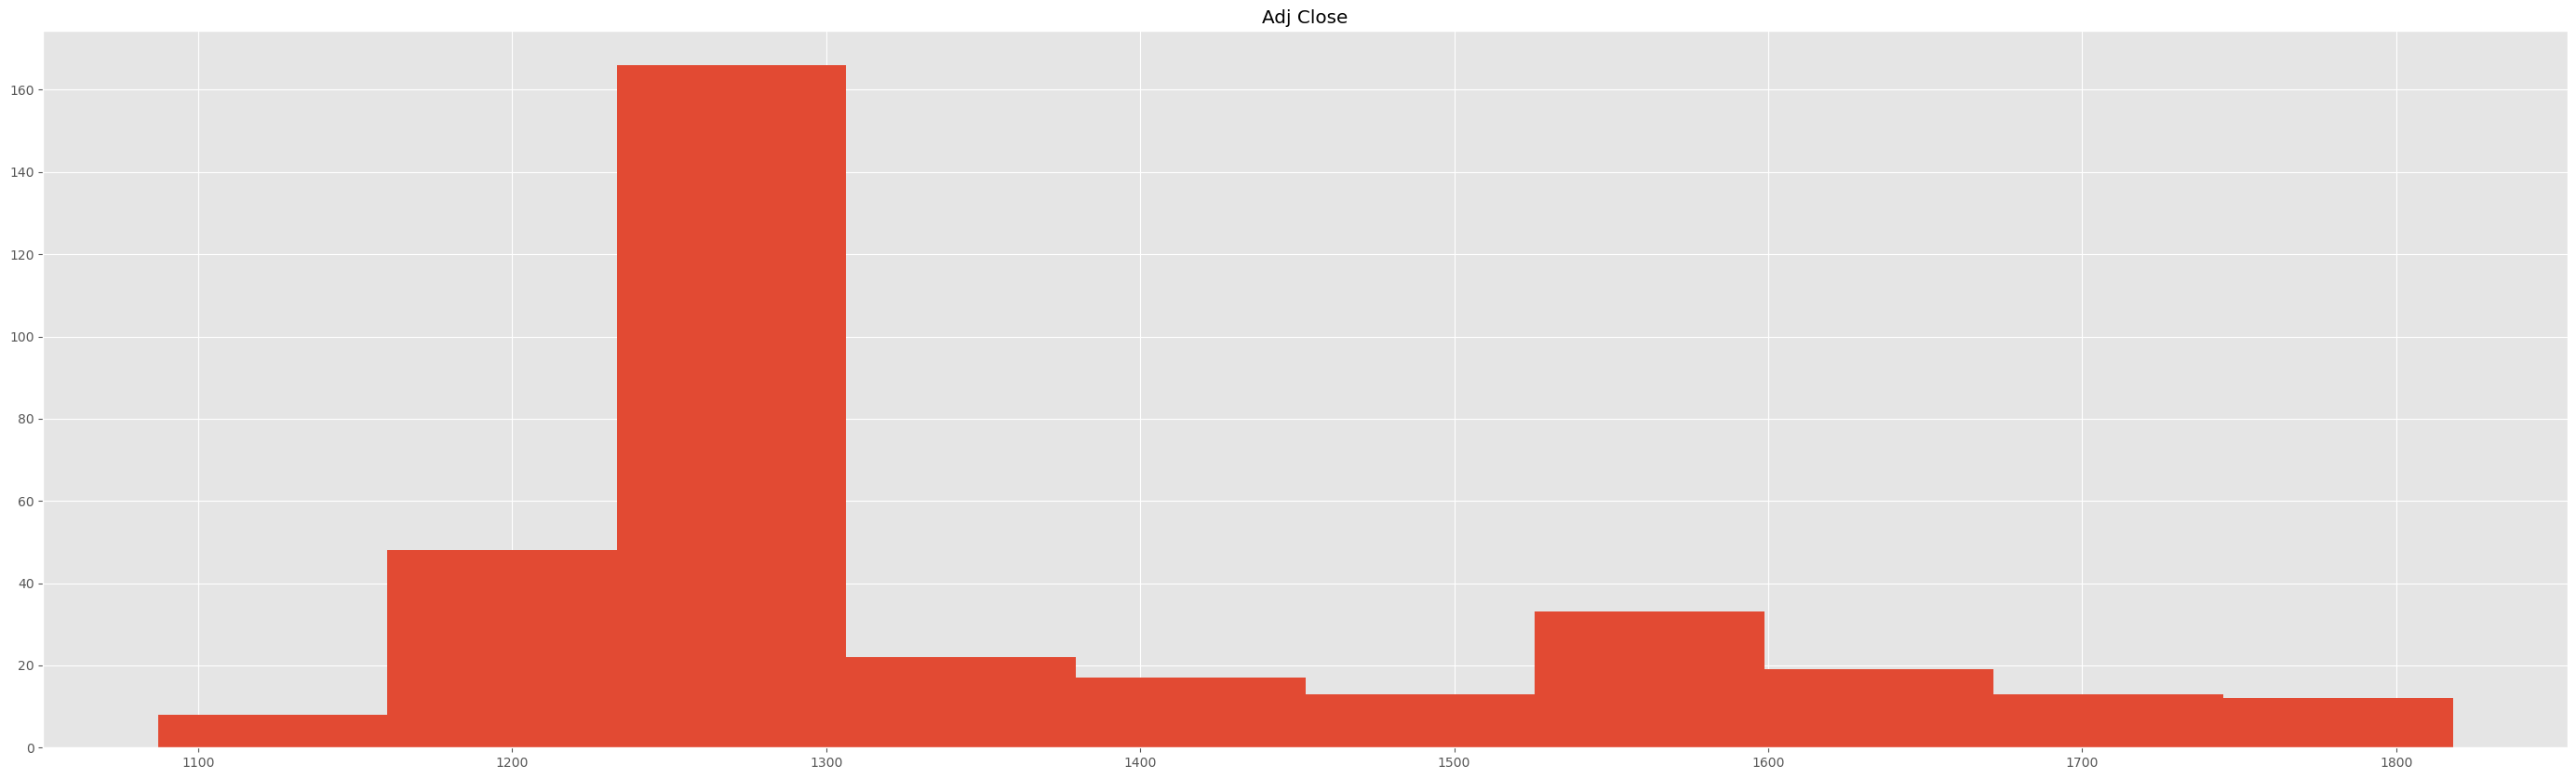

In [ ]:
df.hist(figsize=(35,10))
plt.show()

No me interesan los valores bajos, ya que fueron reemplazados con el percentil del 25%. 📉  
Sin embargo, sí me interesa identificar dónde se encuentran los picos más altos de los precios. 📊  
El gráfico muestra que los valores más elevados se sitúan entre los **S1500** y **S1600** dólares. 💵✨  
Estos rangos más altos representan picos de precios más escasos y significativos. 📈🏔️  



                                                          Análisis de Autocorrelación

Los valores de nlags se eligen en función del contexto de la serie temporal, el tamaño de los datos, y los patrones que estás interesado en descubrir. En tu caso, 32 podría corresponder a la búsqueda de patrones a más largo plazo, mientras que 10 es para captar las correlaciones más cercanas e inmediatas. Puedes ajustar estos valores según tus necesidades específicas de análisis

Con nlags=32, estás observando la autocorrelación de la serie temporal durante un mes completo (o aproximadamente 32 días si son datos diarios).


nlags=10 es más útil para observar las correlaciones a corto plazo, como patrones semanales.

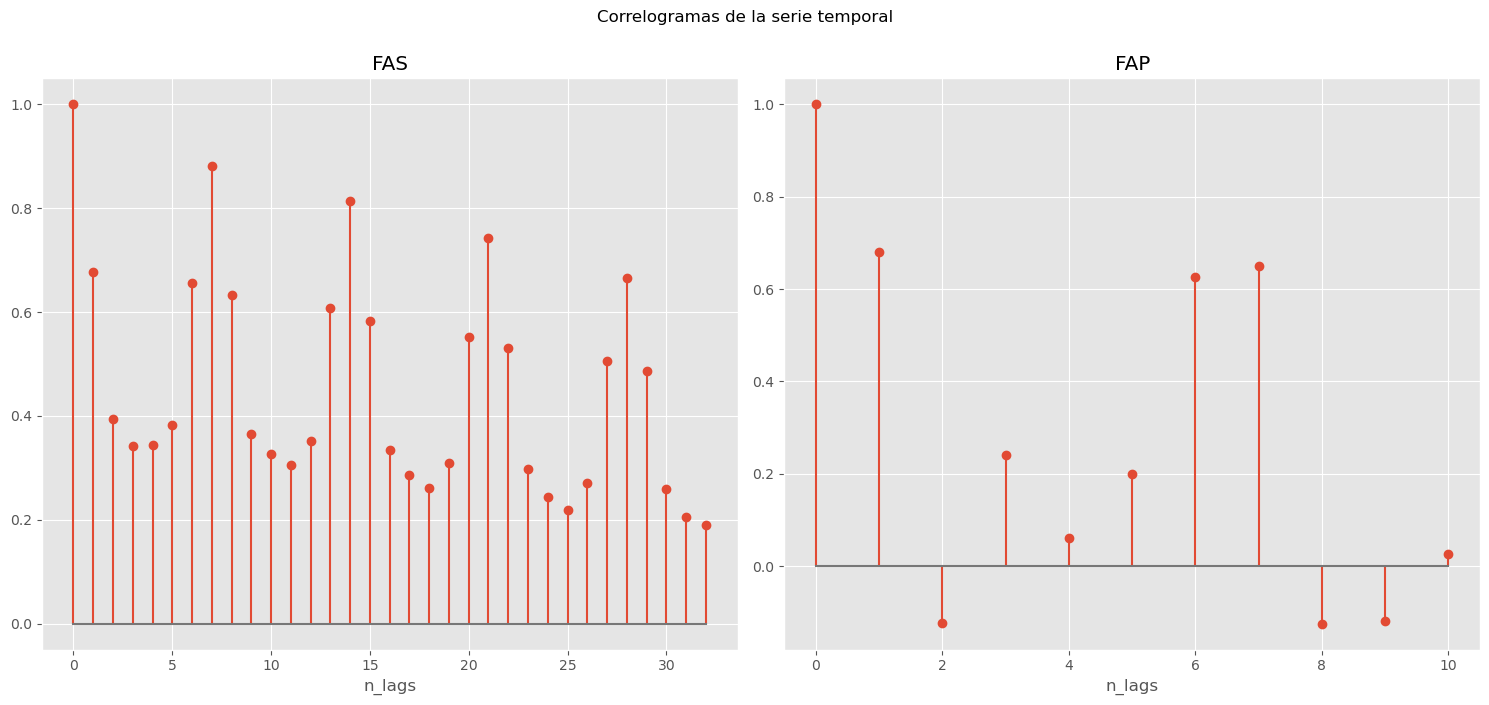

In [ ]:
#Análisis de Autcorrelación

fas = sm.tsa.acf(df, nlags=32)
fap = sm.tsa.pacf(df, nlags=10)

fig, axs = plt.subplots(1, 2, figsize=(15,7))
fig.suptitle('Correlogramas de la serie temporal', y=1)
axs[0].stem(fas)
axs[0].set_title('FAS')
axs[0].set_xlabel('n_lags')
axs[0].grid(True)
axs[1].stem(fap)
axs[1].set_title('FAP')
axs[1].set_xlabel('n_lags')
axs[1].grid(True)
plt.tight_layout()
plt.show()

La autocorrelación muestra que los retardos autocorrelacionados se encuentran principalmente en los lags en de intervalos de 7, es decir
pasa de 0 a 7 a 14 a 21 y a 28. Los intervalos de 7 tienen un valor más cercano a 1. Es observable que en los lags parciales hay una correlación negativa en los lags de 2, 8 y 9. Por ende a la hora de definir parámetros, considero intervalos de 7.

In [ ]:
# Analiza los picos en múltiplos de 7
intervalo = 7
umbral = 0.2  # Ajusta este valor según el umbral que consideres significativo

# Encuentra los picos en múltiplos de 7
picos_fas = [i for i in range(len(fas)) if i % intervalo == 0 and fas[i] > umbral]

# Imprime la conclusión basada en los picos
if picos_fas:
    print(f"Picos identificados en múltiplos de {intervalo}: {picos_fas}")
    print(f"Los picos en múltiplos de {intervalo} indican una posible estacionalidad con un periodo de {intervalo}.")
else:
    print(f"No se encontraron picos significativos en múltiplos de {intervalo}.")


Picos identificados en múltiplos de 7: [0, 7, 14, 21, 28]
Los picos en múltiplos de 7 indican una posible estacionalidad con un periodo de 7.


La media y el desvío acompaña la curva de precios.

                                                       Descomposición de la serie temporal

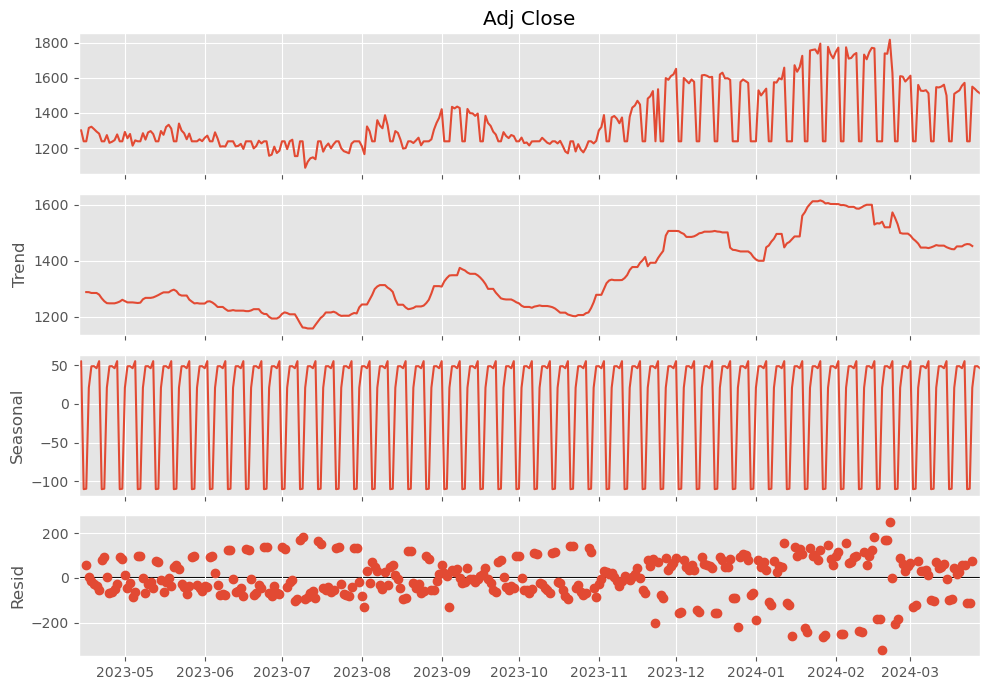

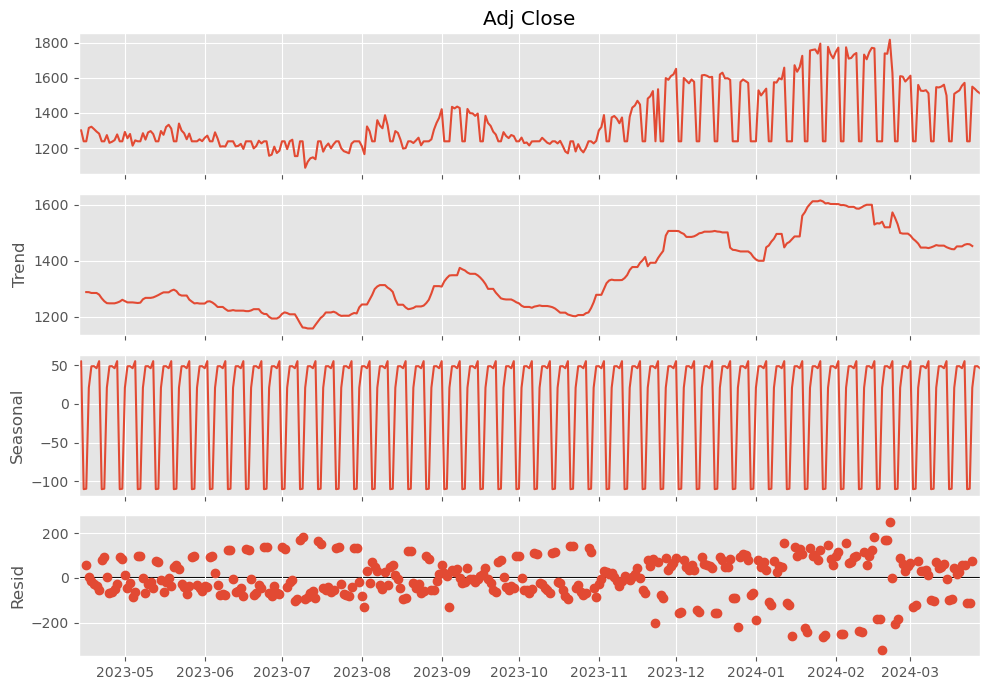

In [ ]:
#Descomposición de la Serie
plt.rcParams["figure.figsize"] = (10, 7)
a = seasonal_decompose(df["Adj Close"], model = "add")
a.plot()

**Análisis de Tendencia y Residuos** 📊

Se destacan dos puntos: **la tendencia** y **la dispersión de los residuos**. 🔍  
La tendencia muestra un pico alto, lo que sugiere que podríamos estar cerca del punto máximo: podría ser el momento de vender 📉 o tal vez aún quede espacio para subir 📈.  
Sin embargo, los residuos se ven muy dispersos en el último tramo, indicando que el reciente aumento puede ser más especulativo que real. 💹 Esto podría implicar una posible caída en el futuro cercano. 📉💡


# Clase No. 4 - Pruebas estadísticas y validación de la serie temporal

###     Capítulo 1: estimadores estadísticos relevantes

                                                             Prueba de Dickey - Fuller

In [ ]:
def Prueba_Dickey_Fuller(series, column_name):  # Define una función para realizar la prueba de Dickey-Fuller
    print(f'Resultados de la prueba de Dickey-Fuller para columna: {column_name}')  # Imprime el nombre de la columna analizada
    dftest = adfuller(series, autolag='AIC')  # Realiza la prueba de Dickey-Fuller utilizando el criterio de información de Akaike (AIC) para elegir el número óptimo de lags
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Número de observaciones utilizadas'])  # Crea una serie de pandas para almacenar los resultados clave de la prueba (estadístico de prueba, valor p, número de lags utilizados y número de observaciones)
    for key, value in dftest[4].items():  # Itera sobre los valores críticos de la prueba de Dickey-Fuller
       dfoutput['Critical Value (%s)' % key] = value  # Agrega los valores críticos a la serie de resultados
    print(dfoutput)  # Imprime los resultados de la prueba

    # Condicional para evaluar la estacionariedad de los datos
    if dftest[1] <= 0.05:  # Si el valor p es menor o igual a 0.05, se considera que hay evidencia suficiente para rechazar la hipótesis nula
        print("Conclusión: ===>")
        print("Rechazar la hipótesis nula")  # Indica que se rechaza la hipótesis nula
        print("Los datos son estacionarios")  # Indica que la serie temporal es estacionaria
    else:
        print("Conclusión: ===>")
        print("No se puede rechazar la hipótesis nula")  # Indica que no se puede rechazar la hipótesis nula
        print("Los datos no son estacionarios")  # Indica que la serie temporal no es estacionaria


### Capítulo 2: prueba ADF

In [ ]:
Prueba_Dickey_Fuller(df['Adj Close'],'Adj Close')

Resultados de la prueba de Dickey-Fuller para columna: Adj Close
Test Statistic                         -1.088401
p-value                                 0.719675
No Lags Used                           13.000000
Número de observaciones utilizadas    337.000000
Critical Value (1%)                    -3.449904
Critical Value (5%)                    -2.870155
Critical Value (10%)                   -2.571360
dtype: float64
Conclusión: ===>
No se puede rechazar la hipótesis nula
Los datos no son estacionarios


In [ ]:
df1 = df.copy()  # Crea una copia del DataFrame original 'df' para no modificarlo directamente
df1['Adj Close'] = df['Adj Close'].diff()  # Calcula la diferencia entre los valores consecutivos de la columna 'Adj Close' y los almacena en la misma columna de 'df1'
df1.dropna(inplace=True)  # Elimina las filas con valores NaN (generados por la primera diferencia calculada) en el DataFrame 'df1'
df1.head()  # Muestra las primeras 5 filas del DataFrame 'df1' para visualizar los cambios


,Adj Close
Date,
2023-04-14,5.760010
2023-04-15,-63.680005
2023-04-16,0.000000
2023-04-17,76.539990
2023-04-18,6.729981


### Capítulo 3: Intervalos de confianza

In [ ]:
Prueba_Dickey_Fuller(df1['Adj Close'],'Adj Close')

Resultados de la prueba de Dickey-Fuller para columna: Adj Close
Test Statistic                       -7.168833e+00
p-value                               2.839435e-10
No Lags Used                          1.200000e+01
Número de observaciones utilizadas    3.370000e+02
Critical Value (1%)                  -3.449904e+00
Critical Value (5%)                  -2.870155e+00
Critical Value (10%)                 -2.571360e+00
dtype: float64
Conclusión: ===>
Rechazar la hipótesis nula
Los datos son estacionarios


### Capítulo 4: prueba T-stat  

En las pruebas de Dickey-Fuller, definimos un **p-value** de 0.05, lo que significa que si el valor es menor a 0.05, los datos se consideran estacionarios. 📉🔍

Al realizar la prueba con los precios originales, el resultado muestra que **no son estacionarios**. ❌📊 Sin embargo, cuando aplicamos la prueba a las **variaciones de precios** (diferencias), sí encontramos una estación definida. ✅📈 Esto indica que las variaciones en los precios tienen un comportamiento estable en el tiempo.

Este comportamiento puede ser debido a factores del mercado, como la especulación 📉💹, o responder a ciclos económicos definidos 📊📅, como los reportes de balances y otros eventos recurrentes en el mercado. 🏦📆


# Módulo N° 3: Análisis Económico y Despliegue Final de la Serie Temporal en Inversiones Bursátiles

### - Clase No. 1 - Análisis avanzado y patrones estacionales en series temporales
    
    Capítulos de la clase 1
    
    Capítulo 1: análisis avanzado de resolución de series temporales
    
    Capítulo 2: datos relevantes del algoritmo
    
    Capítulo 3: Cómo las series temporales son capaces de encontrar patrones estacionales
    
    Capítulo 4: Combinaciones matemáticas clave

                                                     Preparación de datos para los modelos

In [ ]:
# Separación de Datos para Entrenamiento

train_data = df[:len(df)-12]  # Selecciona los datos desde el inicio hasta 12 días antes del final para entrenamiento
test_data = df[len(df)-12:]  # Selecciona los últimos 12 días de datos para prueba
test = test_data.copy()  # Crea una copia del conjunto de prueba para preservar los datos originales durante el análisis
#

In [ ]:
train_data.shape, test_data.shape

((339, 1), (12, 1))

In [ ]:
test_data

,Adj Close
Date,
2024-03-17,1238.200000
2024-03-18,1509.050049
2024-03-19,1519.439941
2024-03-20,1528.839966
2024-03-21,1555.689941
2024-03-22,1571.989990
2024-03-23,1238.200000
2024-03-24,1238.200000
2024-03-25,1550.069946


Se crearon dos dataframes para probar los modelos

                                                                    MODELO ARIMA

# Clase No. 2 - Descubrimiento de patrones y análisis preliminar de resultados
## Capítulo 1: Descubriendo patrones interesantes

El primer modelo que se utilizaría sería con un modelo autoregresivo de medias móviles. Es decir que los datos del futuro responden a valores del pasado. Debido a que las pruebas de Dickey-Fuller muestran que los precios no son estacionarios pero si sus variabilidades surgen dos opciones: ARIMA o SARIMAX.

In [ ]:
from pmdarima import auto_arima  # Importa la función auto_arima para automatizar el ajuste del modelo ARIMA

modelo_auto = auto_arima(
    train_data,              # Conjunto de datos de entrenamiento (serie temporal)

    start_p=0,               # Valor inicial para el orden autorregresivo p; comenzamos con 0 para explorar desde el modelo más simple.
    d=1,                     # Diferenciación regular; 1 indica que se aplica una diferenciación para eliminar tendencias y hacer los datos estacionarios.
    start_q=0,               # Valor inicial para el orden de la media móvil q; se inicia en 0 para explorar a partir de un modelo simple.

    max_p=5,                 # Máximo valor para el orden autorregresivo p; permite explorar modelos con hasta 5 términos AR.
    max_d=5,                 # Máximo valor para la diferenciación d; se limita a 5 para evitar sobreajustar con demasiadas diferencias.
    max_q=5,                 # Máximo valor para el orden de la media móvil q; permite explorar modelos con hasta 5 términos MA.

    start_P=0,               # Valor inicial para el componente estacional autorregresivo P; se inicia en 0 para evaluar desde un modelo simple.
    D=1,                     # Diferenciación estacional; se fija en 1 porque se espera eliminar una estacionalidad en los datos.
    start_Q=0,               # Valor inicial para el componente estacional de media móvil Q; se inicia en 0 para explorar desde la configuración más simple.

    max_P=0,                 # Máximo valor para el componente estacional autorregresivo P; se establece en 0 para no incluir términos AR estacionales adicionales.
    max_D=1,                 # Máximo valor para la diferenciación estacional D; se limita a 1 ya que usualmente una diferenciación estacional es suficiente.
    max_Q=2,                 # Máximo valor para el componente estacional de media móvil Q; permite hasta 2 términos MA estacionales para capturar fluctuaciones estacionales leves.

    m=7,                     # Periodicidad estacional; 7 indica un ciclo semanal (por ejemplo, para datos diarios con estacionalidad semanal).
    seasonal=True,           # Indica que se debe considerar la estacionalidad en el modelo; importante para series temporales con patrones estacionales.

    error_action='warn',     # Acción a tomar en caso de error; 'warn' muestra advertencias en vez de detener la ejecución.
    trace=True,              # Muestra el proceso de ajuste y selección del modelo; útil para seguimiento y depuración.
    supress_warnings=True,   # Suprime las advertencias para una salida más limpia durante el ajuste del modelo.

    stepwise=True,           # Utiliza un enfoque iterativo paso a paso para buscar el mejor modelo; es más eficiente que probar todas las combinaciones.
    random_state=20,         # Establece una semilla para los números aleatorios; asegura reproducibilidad en la selección del modelo.
    n_fits=200               # Número máximo de modelos que se ajustarán durante la búsqueda; mayor número permite mayor exploración, pero toma más tiempo.
)

print(modelo_auto)  # Imprime el mejor modelo ARIMA ajustado automáticamente basado en los parámetros proporcionados


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=3988.419, Time=0.02 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=3920.872, Time=0.05 sec


 ARIMA(0,1,1)(0,1,1)[7]             : AIC=3797.415, Time=0.13 sec
 ARIMA(0,1,1)(0,1,0)[7]             : AIC=3862.136, Time=0.04 sec
 ARIMA(0,1,1)(0,1,2)[7]             : AIC=3796.267, Time=0.27 sec
 ARIMA(0,1,0)(0,1,2)[7]             : AIC=3906.715, Time=0.19 sec
 ARIMA(1,1,1)(0,1,2)[7]             : AIC=3789.671, Time=0.43 sec
 ARIMA(1,1,1)(0,1,1)[7]             : AIC=3792.326, Time=0.23 sec
 ARIMA(1,1,0)(0,1,2)[7]             : AIC=3858.455, Time=0.22 sec
 ARIMA(2,1,1)(0,1,2)[7]             : AIC=3791.489, Time=0.56 sec
 ARIMA(1,1,2)(0,1,2)[7]             : AIC=inf, Time=1.18 sec
 ARIMA(0,1,2)(0,1,2)[7]             : AIC=3789.858, Time=0.38 sec
 ARIMA(2,1,0)(0,1,2)[7]             : AIC=3840.636, Time=0.27 sec
 ARIMA(2,1,2)(0,1,2)[7]             : AIC=inf, Time=1.00 sec
 ARIMA(1,1,1)(0,1,2)[7] intercept   : AIC=3791.651, Time=0.48 sec

Best model:  ARIMA(1,1,1)(0,1,2)[7]          
Total fit time: 5.444 seconds
 ARIMA(1,1,1)(0,1,2)[7]          


###  Capítulo 2: Evidencias relevantes de la serie desde una óptica algorítmica

### 📊 Interpretación del Resultado

- **Modelo ARIMA(1,1,1):** Utiliza un término autorregresivo (**p = 1**), una diferenciación (**d = 1**) para hacer la serie estacionaria, y un término de media móvil (**q = 1**). 🔄

- **Componente Estacional SARIMA(0,1,2)[7]:** Considera una diferenciación estacional (**D = 1**) para capturar patrones que se repiten semanalmente (**m = 7**) 📅 y utiliza 2 términos de media móvil estacionales (**Q = 2**). 🌊

### 🔍 En Resumen:
Este modelo indica que el valor actual de la serie depende de su valor inmediato anterior, de los errores de predicción anteriores, y de los patrones cíclicos semanales, ajustando tanto componentes regulares como estacionales para capturar mejor el comportamiento de los datos. 📈🌀

### ❓ ¿Por Qué Es Importante Este Resultado?
Este resultado te indica que el modelo seleccionado se adapta bien a los datos, considerando tanto los patrones no estacionales como los estacionales (semanales). ✅ La combinación de parámetros fue elegida porque minimiza el AIC, proporcionando el mejor ajuste posible a tus datos de serie temporal. 📉✨


### Capítulo 3: Fundamentos teóricos que respaldan los resultados

In [ ]:
print(modelo_auto.summary())

                                       SARIMAX Results                                        
Dep. Variable:                                      y   No. Observations:                  339
Model:             SARIMAX(1, 1, 1)x(0, 1, [1, 2], 7)   Log Likelihood               -1889.836
Date:                                Mon, 16 Jun 2025   AIC                           3789.671
Time:                                        16:53:44   BIC                           3808.682
Sample:                                    04-13-2023   HQIC                          3797.254
                                         - 03-16-2024                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2009      0.056      3.564      0.000       0.090       0.311
ma.

El resultado es un modelo SARIMAX, lo cuál implica que hay estacionalidad en los datos. Por ende, realizamos el ajuste de los parámetros (p,d y q). Entre los datos vemos que toma el lags 7 como mejor parámetro, esto se corrobora con los gráficos de autocorrelación.

In [ ]:
arima_model = SARIMAX(train_data["Adj Close"], order = (1,1,1), seasonal_order = (0,1,2,7))
arima_result = arima_model.fit()
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                              Adj Close   No. Observations:                  339
Model:             SARIMAX(1, 1, 1)x(0, 1, [1, 2], 7)   Log Likelihood               -1889.836
Date:                                Mon, 16 Jun 2025   AIC                           3789.671
Time:                                        16:53:45   BIC                           3808.682
Sample:                                    04-13-2023   HQIC                          3797.254
                                         - 03-16-2024                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2009      0.056      3.564      0.000       0.090       0.311
ma.L1         -0.8586      0.038    -22.812      0.000      -0.932      -0.785
ma.S.L7       -0.5074      0.036    -14.044      0.000      -0.578      -0.437
ma.S.L14      -0.1271      0.030     -4.210      0.000      -0.186      -0.068
sigma2      5257.9749    251.458     20.910      0.000    4765.126    5750.824
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1372.29
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               7.23   Skew:                            -0.67
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Tenemos un modelo estadisticamente muy significativo :) esos pz estan bellos :)

Analizamos los residuos

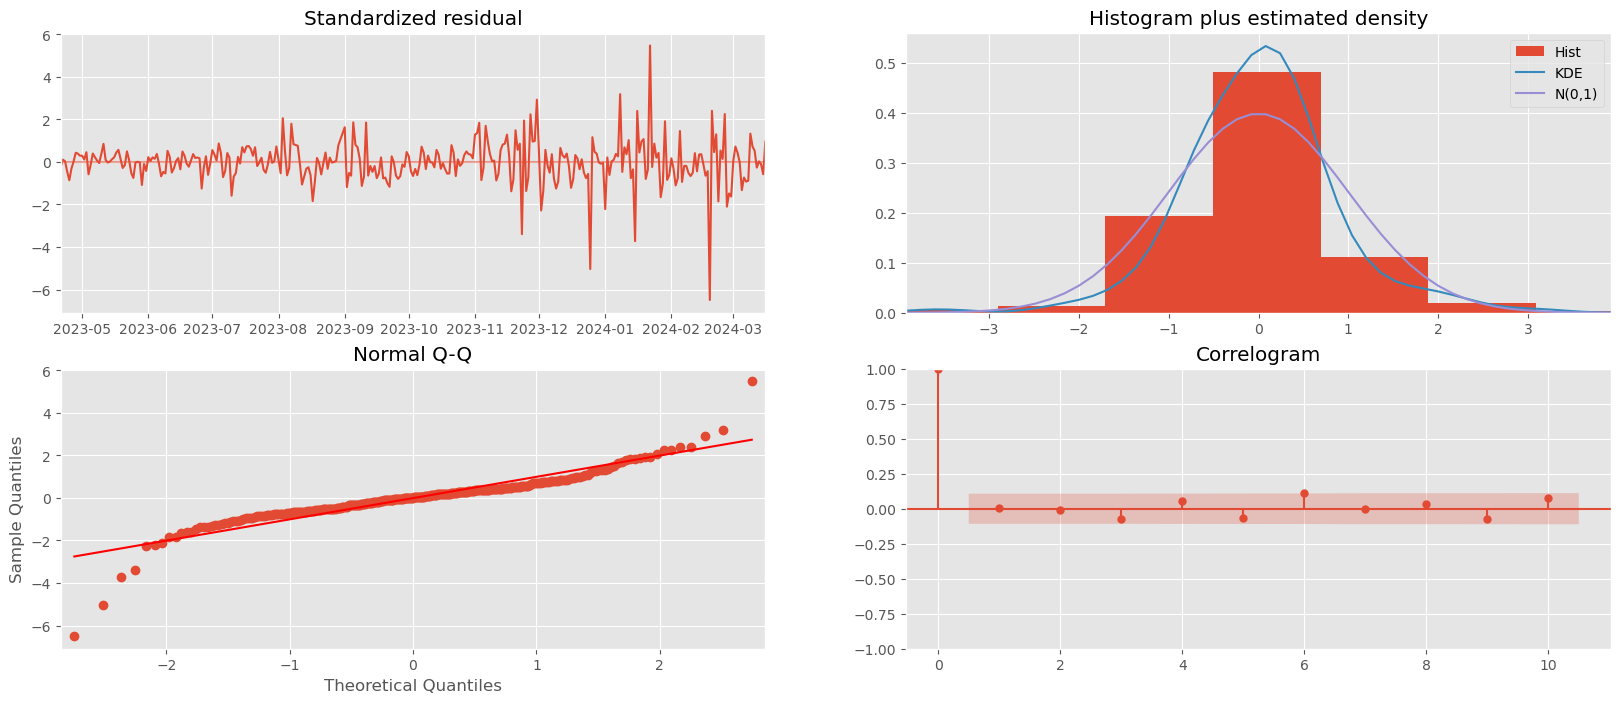

In [ ]:
modelo_auto.plot_diagnostics(figsize=(20,8))
plt.show()

Los residuos tienen una distribución normal y se ubican en la recta salvo al los últimos tramos. Los residuos estandarizados se mantienen dentro de la recta salvo el último tramo donde vemos la tendencia alcista de la acción. Ahora predecimos

In [ ]:
arima_pred = arima_result.predict(start = len(train_data), end = len(df)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

2024-03-17    1198.482200
2024-03-18    1506.942964
2024-03-19    1543.460819
2024-03-20    1543.103665
2024-03-21    1560.014017
2024-03-22    1518.292436
2024-03-23    1188.499419
2024-03-24    1168.934988
2024-03-25    1482.382773
2024-03-26    1526.494133
2024-03-27    1525.317666
2024-03-28    1543.223942
Freq: D, Name: ARIMA Predictions, dtype: float64

Gráficamos la predicción comparando con los valores reales y sacamos la métrica

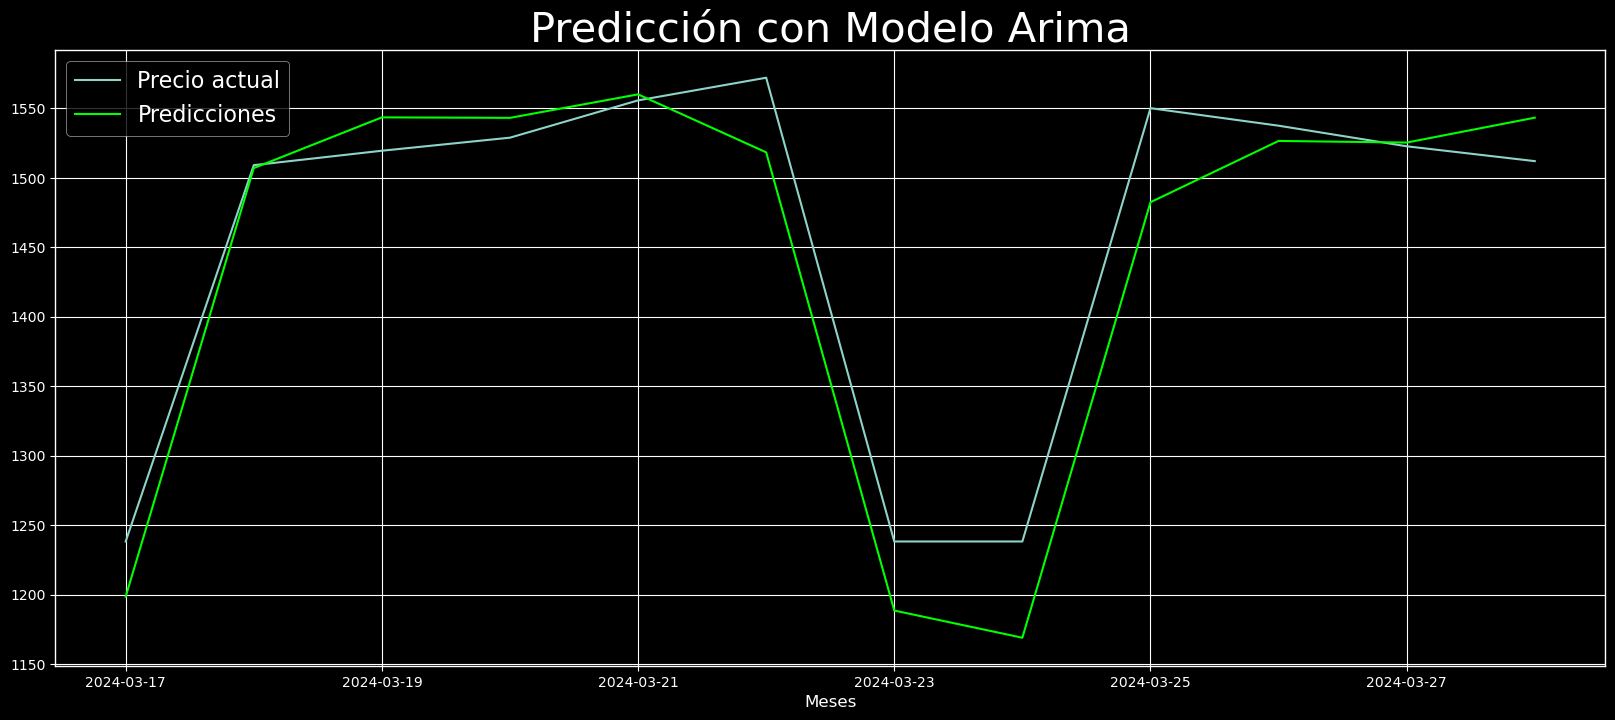

In [ ]:
plt.style.use('dark_background')
plt.rcParams["figure.figsize"] = (20, 8)

plt.plot(test_data["Adj Close"], label="Precio actual")
plt.plot(arima_pred, color="lime", label="Predicciones")
plt.title("Predicción con Modelo Arima", fontsize=30);
plt.xlabel('Meses')
plt.ylabel('')
plt.legend( fontsize=16);
plt.show()

In [ ]:
evaluacion_metrica(test_data,arima_pred)

Evaluation metric results:-
MSE is : 1518.2224411576783
MAE is : 30.806775747434568
RMSE is : 38.96437399930452
MAPE is : 9.807807209595145
R2 is : 0.909224027264913



###  Capítulo 4: Conclusiones y recomendaciones en esta fase preliminar

El R2 es del 90% lo cuál es alto para este tipo de predicciones. El error medio cuadrático es de 30.80. Predecimos a un mes en este caso 28 días ya que sería el último día hábil para definir la opción de compra o venta; y graficamos

In [ ]:
arima_pred2 = arima_result.predict(start = len(test_data), end = len(df)+28, typ="levels").rename("ARIMA Predictions")
arima_pred2

2023-04-25    1302.028841
2023-04-26    1261.593040
2023-04-27    1243.287485
2023-04-28    1242.774495
2023-04-29    1207.149924
                 ...     
2024-04-22    1409.461852
2024-04-23    1453.776842
2024-04-24    1452.641278
2024-04-25    1470.555771
2024-04-26    1433.535063
Freq: D, Name: ARIMA Predictions, Length: 368, dtype: float64

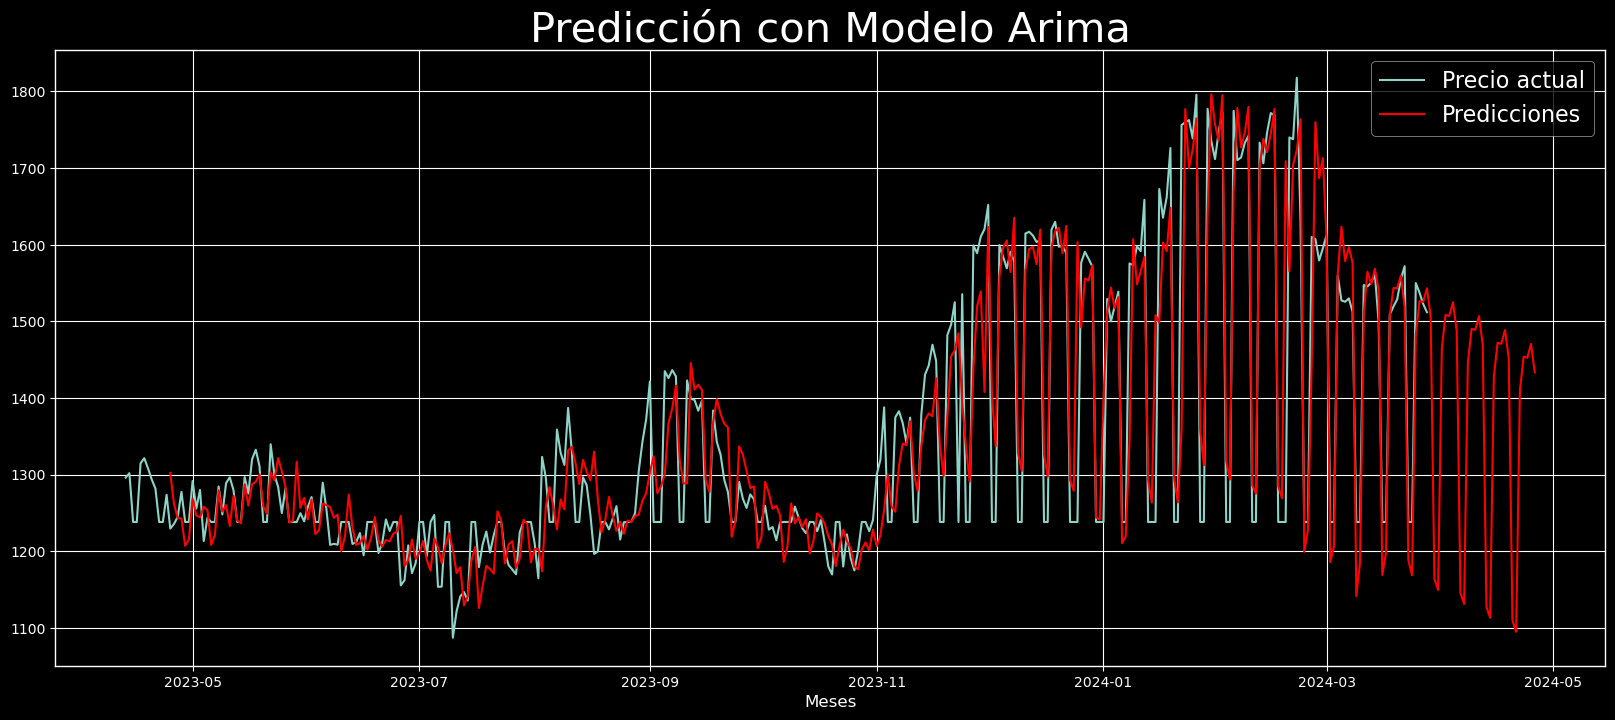

In [ ]:
plt.style.use('dark_background')
plt.rcParams["figure.figsize"] = (20, 8)

plt.plot(df["Adj Close"], label="Precio actual")
plt.plot(arima_pred2, color="red", label="Predicciones")
plt.title("Predicción con Modelo Arima", fontsize=30);
plt.xlabel('Meses')
plt.ylabel('')
plt.legend( fontsize=16);
plt.show()

                                                                     RESUMEN y VALORIZACIÓN

# Clase No. 3 - Evaluación de métricas y análisis económico del modelo

### Capítulo 1: Aplicación de técnicas claves entorno a series temporales

### Capítulo 2: métricas

### Capítulo 3: Resultados obtenidos

### Capítulo 4: Conclusiones

In [ ]:
# Valores iniciales
valor_inicial = 1511.96  # Valor de la acción el 28/03/2024 en USD
valor_final = 1433.53    # Valor de la acción el 26/04/2024 en USD
ipc_eeuu = 3.4           # IPC de EE.UU. en %

# Cálculos
diferencia = ((valor_inicial - valor_final) / valor_inicial) * 100
ganancia_potencial = ((valor_inicial - valor_final) / valor_final) * 100
ganancia_diaria = ganancia_potencial / 30
tnm = ((1 + ganancia_diaria / 100) ** 30 - 1) * 100
ganancia_vs_inflacion = tnm - ipc_eeuu

# Relación de compra de nominales
relacion_compra_nominal = 1.05

# Mostrar resultados
print("### 📉 Conclusiones sobre el Precio de las Acciones de Meli")
print(f"1. 📅 Fecha de referencia: El 28/03/2024, las acciones de Meli valían {valor_inicial:.2f} USD.")
print(f"2. 📉 Evolución del Precio: Para el 26/04/2024, las acciones bajaron a {valor_final:.2f} USD.")
print(f"   - 🔻 Diferencia: {diferencia:.2f}% de pérdida de valor.")
print()
print("### 💡 Recomendación Estratégica:")
print(f"Hubiera sido recomendable vender el 28/03/2024 y recomprar más barato el 26/04/2024, obteniendo una ganancia potencial de {ganancia_potencial:.2f}%.")
print(f"   - 📆 Ganancia diaria: {ganancia_diaria:.3f}% por día.")
print(f"   - 🔄 Tasa Mensual Nominal (TNM): {tnm:.2f}%")
print(f"   - 🌍 Comparación con IPC de EE.UU.: {ganancia_vs_inflacion:.2f}% por encima de la inflación norteamericana ({ipc_eeuu}%).")
print()
print("### 🤑 Relación de Compra de Nominales:")
print(f"Con esta estrategia, habríamos obtenido una relación de compra de nominales de {relacion_compra_nominal:.2f}.")
print(f"Es decir, con la misma cantidad de dinero invertida, habríamos comprado un {relacion_compra_nominal * 100 - 100:.0f}% más en acciones.")


### 📉 Conclusiones sobre el Precio de las Acciones de Meli
1. 📅 Fecha de referencia: El 28/03/2024, las acciones de Meli valían 1511.96 USD.
2. 📉 Evolución del Precio: Para el 26/04/2024, las acciones bajaron a 1433.53 USD.
   - 🔻 Diferencia: 5.19% de pérdida de valor.

### 💡 Recomendación Estratégica:
Hubiera sido recomendable vender el 28/03/2024 y recomprar más barato el 26/04/2024, obteniendo una ganancia potencial de 5.47%.
   - 📆 Ganancia diaria: 0.182% por día.
   - 🔄 Tasa Mensual Nominal (TNM): 5.62%
   - 🌍 Comparación con IPC de EE.UU.: 2.22% por encima de la inflación norteamericana (3.4%).

### 🤑 Relación de Compra de Nominales:
Con esta estrategia, habríamos obtenido una relación de compra de nominales de 1.05.
Es decir, con la misma cantidad de dinero invertida, habríamos comprado un 5% más en acciones.


##conclusiones


Partimos de la fecha del 28-3-24 ese día las acciones de Meli valían 1.511,96 USD. El día 26-4-24 las acciones bajaron. La predicción arroja un valor de 1.433,53 USD una diferencia del 1.92% con respecto al valor real de la acción de ese día. Esto implica que hay una diferencia de 1.82% de pérdida de valor en la acción.

Sin embargo según la predicción la recomendación sería haber vendido ese día para poder comprar barato en un mes. Esto implica una ganancia del 5.187%. En términos diarios sería una ganancia diaria del 0.179% en dólares. Si convertimos esa ganancia en tasa mensual nominal (TNM) tendríamos una tasa del 5.55% dos puntos más que el IPC de EEUU del 3.4% por ende hubiésemos ganando un 2% por encima de la inflación norteamericana y haber obtenido una relación de compra de nominales de 1.05 es decir, que con la misma cantidad obtendríamos un 5% más en acciones. INALES	 1,08 	 1,05


# Clase No. 4 - Despliegue de la serie temporal mediante MLOps

In [ ]:
#pip install wandb --upgrade


In [ ]:
import wandb
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import os

# Configura tu API KEY y el nombre del notebook (reemplaza con tu información)
os.environ['WANDB_API_KEY'] = 'ff6a4fc4c1b560466ab53c8b781d370b095770e7'  # Reemplaza 'tu_api_key' con tu clave de API real
os.environ['WANDB_NOTEBOOK_NAME'] = 'Pronostico_Accion_Meli_(3).ipynb'

# Inicializa un proyecto en WandB
wandb.init(project="ARIMA_Model_Experiments", entity="japr220686")  # Reemplaza "tu_usuario" con tu nombre de usuario de WandB


wandb: WARNING WANDB_NOTEBOOK_NAME should be a path to a notebook file, couldn't find Pronostico_Accion_Meli_(3).ipynb.
wandb: Currently logged in as: japr2206 (japr220686) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


## Capítulo 3: Caso práctico con Weights & Biases

In [ ]:
# Ajustar el modelo ARIMA automáticamente
modelo_auto = auto_arima(
    train_data['Adj Close'],
    start_p=0, d=1, start_q=0,
    max_p=5, max_d=5, max_q=5,
    start_P=0, D=1, start_Q=0,
    max_P=0, max_D=1, max_Q=2,
    m=7, seasonal=True, error_action='warn', trace=True,
    suppress_warnings=True, stepwise=True, random_state=20, n_fits=200
)

# Imprimir el mejor modelo ARIMA ajustado
print(modelo_auto)

# Registrar parámetros en wandb
wandb.config.update({
    "start_p": 0, "d": 1, "start_q": 0,
    "max_p": 5, "max_d": 5, "max_q": 5,
    "start_P": 0, "D": 1, "start_Q": 0,
    "max_P": 0, "max_D": 1, "max_Q": 2,
    "m": 7, "seasonal": True
})

# Ajustar el modelo SARIMA
arima_model = SARIMAX(train_data["Adj Close"], order=(1, 1, 1), seasonal_order=(0, 1, 2, 7))
arima_result = arima_model.fit()

# Resumen del modelo ajustado
print(arima_result.summary())

# Registrar métricas del modelo en wandb
wandb.log({"AIC": arima_result.aic, "BIC": arima_result.bic})

# Realizar predicciones
arima_pred = arima_result.predict(start=len(train_data), end=len(df)-1, typ="levels").rename("ARIMA Predictions")

# Registrar las predicciones en wandb
wandb.log({"predictions": wandb.Table(dataframe=pd.DataFrame({
    "Fecha": pd.date_range(start=test_data.index[0], periods=len(arima_pred), freq='D'),
    "Predicciones": arima_pred
}))})

# Realizar predicciones adicionales
arima_pred2 = arima_result.predict(start=len(test_data), end=len(df)+28, typ="levels").rename("ARIMA Predictions")

# Registrar predicciones adicionales en wandb
wandb.log({"predictions_extended": wandb.Table(dataframe=pd.DataFrame({
    "Fecha": pd.date_range(start=test_data.index[0], periods=len(arima_pred2), freq='D'),
    "Predicciones Extensas": arima_pred2
}))})

# Finalizar wandb
wandb.finish()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=3988.419, Time=0.01 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=3920.872, Time=0.04 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=3797.415, Time=0.22 sec
 ARIMA(0,1,1)(0,1,0)[7]             : AIC=3862.136, Time=0.04 sec
 ARIMA(0,1,1)(0,1,2)[7]             : AIC=3796.267, Time=0.26 sec
 ARIMA(0,1,0)(0,1,2)[7]             : AIC=3906.715, Time=0.19 sec
 ARIMA(1,1,1)(0,1,2)[7]             : AIC=3789.671, Time=0.42 sec
 ARIMA(1,1,1)(0,1,1)[7]             : AIC=3792.326, Time=0.26 sec
 ARIMA(1,1,0)(0,1,2)[7]             : AIC=3858.455, Time=0.23 sec
 ARIMA(2,1,1)(0,1,2)[7]             : AIC=3791.489, Time=0.56 sec
 ARIMA(1,1,2)(0,1,2)[7]             : AIC=inf, Time=1.16 sec
 ARIMA(0,1,2)(0,1,2)[7]             : AIC=3789.858, Time=0.41 sec
 ARIMA(2,1,0)(0,1,2)[7]             : AIC=3840.636, Time=0.29 sec
 ARIMA(2,1,2)(0,1,2)[7]             : AIC=inf, Time=1.06 sec
 ARIMA(1,1,1)(0,1,2)[7] intercept   : AIC=3

AIC,▁
BIC,▁
AIC,3789.67142
BIC,3808.68201


### Cap 4 conlusiones

### 🚀 Qué hacer con los resultados en Weights & Biases:

- **🔗 Compartir:** Envía el enlace de tu proyecto/corrida a colegas o exporta como CSV.
- **📊 Monitorear y Comparar:** Sigue el rendimiento de distintos experimentos y versiones del modelo.
- **🔄 Actualizar Parámetros:** Cambia el código en VS Code y ejecuta para registrar nuevos resultados en una nueva corrida.
  - 📝 Cada `wandb.init()` crea una nueva corrida. Usa el mismo nombre si quieres sobrescribir.
- **👁️‍🗨️ Visualizar Resultados:** Usa las herramientas de visualización de wandb para analizar métricas y tendencias.

### 🔧 Al actualizar parámetros:
- 🆕 Se crea una nueva corrida con los resultados actualizados. Mantienes un historial completo para comparar.

### 📝 Pasos Siguientes:
1. **Ajusta parámetros y ejecuta** para nuevas corridas.
2. **Compara en wandb** los impactos de los cambios.
3. **Comparte tu proyecto** para retroalimentación. 🌐

Gestiona manualmente si prefieres no crear nuevas corridas. 😊
